In [196]:
#importing the required modules
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import anderson, wilcoxon, ttest_ind

In [197]:
home_dir = os.path.join(r'Z:\balint\numt\Michael\data/')

In [198]:
#read pandas dataframe
numt_array = pd.read_csv(home_dir + 'numt_master_array.csv')
numt_array.head()

,score,eg2_value,e_value,g_id,g_start,mt_start,g_length,mt_length,g_strand,mt_strand,g_size,g_sequence,mt_sequence,g_up_flanking,g_down_flanking,"mt_up_flanking (if strand is negative, the coordinates are corrected)","mt_down_flanking (if strand is negative, the coordinates are corrected)",ensembl_gene_id,ensembl_description
0,17245,0.0,0.0,MT,0,0,17245,17245,+,+,17245,GTTAATGTAGCTTAACAACAAAGCAAAGCACTGAAAATGCTTAGAT...,GTTAATGTAGCTTAACAACAAAGCAAAGCACTGAAAATGCTTAGAT...,NaN,NaN,TACAAATTGTATAATATTTGGACTAAACCCCCTTTCCCACCCCAAG...,GTTAATGTAGCTTAACAACAAAGCAAAGCACTGAAAATGCTTAGAT...,ENSOCUG00000029081,NaN
1,3398,0.0,0.0,1,114731432,6976,4680,4681,+,+,194850757,taGTAAAATTATTACATAACTTTGTCGAAGTTAATTTATAGGTTCA...,TAGTAAAACCATTACATAACTTTGTCGAAGTTAATTTATAGGTTCA...,ACAAAAGACTCTGAATAGCCAAAGCGATCCTGAACAAGAAAAATCA...,TATATATATTTATATATATATGTATATATGTACATATATATAACTA...,CCTTCGCCTCAAAACGAGAAGTAGAGACTATTGAACTAACAACCAC...,AACTGCTAATTCATGCTCCCATGTCTAACCCCATGGCTTTCTCAAC...,ENSOCUG00000006104,cilia and flagella associated protein 300 [Sou...
2,3120,0.0,0.0,GL019308,67160,883,4892,4945,+,+,88228,CAAGGCCATGAAGCATGCACACACTGCCCATCGCTCTCCTCAAACA...,CAAGGCCATGAAGCACGCACACACCGCCCGTCACCCTCCTCAAGTG...,GATAAACCCCGATAAACTTTACCACTCTTTGCCAACTCAGCCTCTA...,ATGAAGGGGCAAAGAGTAATTTTACAGTCGAGAGGGCTAGCAGTCA...,TACCGCCATCTTCAGCGAACCCTAAAAAGGAGCAAAAGTAAGCTCA...,TAGGGGCTATTAACTTTATTACAACTATTATTAATATGAAAGCCCC...,ENSOCUG00000031196,NaN
3,1888,0.0,0.0,GL019308,62527,12805,3439,3462,+,+,88228,AATTATTCATAGCCTCAATGATGAACAAGACATCCAAAAAACAGGA...,AATTATTCACAGCCTcaaTGATGAACAGGATATCCGAAAGATAGGC...,GTAGGAATTATATCCTTCCTCCTCATCGGCTGATGGCATGGCCAAG...,ACGTATACATGAGTTGTTCTTACATAATTGAATATACCTGCAATGC...,TGCCTAGGCGCAATCACTACCTTATTCACAGCCCTATGTGCCCTCA...,GTACACCCGTACGCACGCACGTACACCCGTACGCACGCACGTACAC...,ENSOCUG00000037635,NaN
4,1824,0.0,0.0,AAGW02081594,14016,6061,3040,3073,+,+,24576,TTCTTTGGACACCCTGAGGTATATATTCTTATCCTTCCAGGATTCG...,TTTTTCGGGCACCCCGAAGTATATATTCTTATTCTTCCAGGATTTG...,GACATGTCAAAGGAACGCAGAAGCCAGCTTGAAAAAGTCCTCAACA...,TGAAATAGCTATCACTATTCAGGTATGCCACTATTCTTCTAGGCAT...,ATATGAAAGCCCCTGCAATATCTCAATATCAAACCCCCTTATTCGT...,ATTCTCCTAGGTATCTATTTTACCCTACTTCAAGCATCGGAGTATT...,NaN,NaN


In [199]:
#get g_ids and drop the ones that dont have corresponding sequences
g_ids = numt_array['g_id'].drop_duplicates()
g_ids = g_ids.drop(labels = [0,65])

In [200]:
#create dictionary from the numtless sequences
def create_dictionary(g_id):
    global numtless_sequences
    filename = 'numtless_sequences/%s.fasta' % g_id
    sequence = ''
    with open (home_dir + filename) as infile:
        content = infile.readlines()
        try:
            sequence = content[1]
        except IndexError:
            pass
    numtless_sequences[g_id] = sequence
    current_index = g_ids[g_ids == g_id].index[0]
    if current_index % 5 == 0:
        print('done for %s numts!' % current_index)

In [201]:
#create vector for numtless sequences
numtless_sequences = pd.Series(index = g_ids)
g_ids.apply(create_dictionary)
numtless_sequences

C:\Users\pytho\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  


done for 20 numts!
done for 25 numts!
done for 40 numts!
done for 45 numts!
done for 70 numts!
done for 95 numts!
done for 100 numts!
done for 105 numts!
done for 125 numts!


g_id
1               AGGACCGCACAACCTTGCAGCTCAGCGACTCGTGGGGTCACACACA...
GL019308        AGCATTTCCAGCATGCAGTCTCTCCCATGAAGGTGGAGAAGGAACT...
AAGW02081594    TTATCTTTATTTCATCCATGATCAAATATTTCACCCACGATGATTA...
GL019326        GAGACTGGGAAGAAGCTCCTGGCTCCTGGCTTTGGATCAGCGCAGC...
GL018741        TAAAACTAAGAGTCATTCTAATCTTTCCTCTATATCTAATCCCAAC...
18              NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN...
9               CGGGGACTCCCACTAGAGGAACCAGGTGATGTCAGTTCCCAGAATC...
12              CTGAGTTCCTGGCTTCTGGCTTTGGCCTGGCTCAACCCCAGCTGCA...
GL018705        ATAATGATCAGATGATAATGGTGGTGATGATGGTGAGGATGACTCT...
17              GGTGTGGTATATGTGGTGTGTATGGTATGTGTGTGGTACTGTATGG...
GL018700        CCAGATGGATACATGAAGTATGCAGTTGCCTATGTAGTTTAGAACT...
19              NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN...
GL019465        ATACTTGGCTCCCCACCCAGGAGATCGCAGCTTGAGGCATCACCCC...
GL018817        ACCTAATTACAGGGCACCGGTCTATTTAAAAGATATGTTAAGGGAC...
13              TCATAATCCTAACCATAACCAAGGATTCAACCATAAATTTAAGACT...
GL018

In [202]:
lengths = g_ids.apply(lambda x : numt_array.loc[numt_array['g_id'] == x]['g_length'].tolist())
lengths.index = g_ids
lengths

g_id
1               [4680, 698, 1012, 375, 371, 467, 393, 658, 773]
GL019308                           [4892, 3439, 1414, 837, 820]
AAGW02081594                            [3040, 2339, 1650, 577]
GL019326                     [1851, 1451, 1315, 1420, 995, 833]
GL018741                           [1945, 1590, 1074, 552, 503]
18                                        [1440, 407, 292, 482]
9                                          [720, 822, 397, 273]
12                                              [419, 216, 368]
GL018705                                                  [834]
17                                              [595, 407, 352]
GL018700                                                  [896]
19                                                        [930]
GL019465                              [930, 677, 795, 424, 916]
GL018817                                  [674, 1070, 784, 720]
13                                                   [351, 126]
GL018826              [1193, 891, 8

In [234]:
def sampling(g_id):
    sequence_to_sample = numtless_sequences[g_id]
    numt_sizes = lengths[g_id]
    samples = []
    for index, numt_size in enumerate(numt_sizes):
        seed_value = index
        np.random.seed(seed_value)
        start = np.random.randint(0, len(sequence_to_sample) - numt_size)
        end = start + numt_size
        sample_sequence = sequence_to_sample[start:end]
        unknown_nucleotides = sample_sequence.count('N') / len(sample_sequence)
        if unknown_nucleotides < 0.05:
            samples.append(sample_sequence)
        else:
            seed_value += 10
            try:
                return sampling(g_id)
            except RecursionError:
                return g_id
    return samples

In [235]:
#get samples sequences
sequence_samples = g_ids.apply(sampling)
sequence_samples.index = g_ids
sequence_samples

g_id
1                                                               1
GL019308        [GTTCCTGTCCCAGATGCCCCACTTCCAATTAAGCTACTATTGATG...
AAGW02081594    [TACAAAATGATTCTAAATTTTTATAGCAAATATCAGTCTTTACTC...
GL019326                                                 GL019326
GL018741        [AACTTGGAAGAATAAGAAATGAGAAAGTAGGTGATGCTGATTGAG...
18                                                             18
9                                                               9
12              [TAGCCATACGAGACTTCATTCAGGGGAAACTGAAATGTGGCTCAT...
GL018705        [CATGACATCACCCCATGCCTGTCCCCAGTCCCTCCTTCAGTGCCT...
17                                                             17
GL018700        [TGAAGCTTTAACCCACTGAGCCACAATGTTGACCCCTAGAATATA...
19              [ATCAGATGCAGAGTCCAGTGCATTCTCCCTCCATGATGTATCTTT...
GL019465        [CATACAACAATAATACTCCAACTTTCCTGATGAAATTTCAACAAG...
GL018817                                                 GL018817
13              [GGGAGCCTGCAGAGCGCACTTGCTCATGAGCCCCAAGCTAGAAGT...
GL018

In [233]:
numtless_sequences['GL019311']

'CCAGATCCTTGGGCCCTGCATCCACATGGGAGACCAGGAGGAAACACCTGGCTCCTGGCTTTAGATTGCCGCAGCACACTGGCCGTAGCGGCCATTTGGGGGGTGAACAAATGGAAGGAAGACCTTAAAAAAAAAAGGAGGTAGTACTTTACCTTAAGTTGATGCTAAATACATCTTTTAAATTGTTTCACATAATAAAAATGAAGTATTTCTTTAAGTGTATTTGGAATTAATTTGAATTAGGCAATATCAAATAAGAAATATGGAATTAAATGTTAATTTAGGTGCAAAAATTTCTTAAATATGTGTAATTCTTTCATACTGAATATTGCCCATTGAATTGTAAGACCCCTTGTCTTTAGGGTCTCAAGTATTTTTGAACCAAATTGAGCAAAATATGTGCAACCTTGTCTTGTTTGTTTGTCTTCACTTTCTTCTGTGAAGCCCAAAGTCAGGAGCCTCTCTGCCCAGCCATAATATTTCAAGTGAGTATTCCATGCCTGTCATATTTTTGGAGCTCTATAACCATAAGCACAGTCTAATATAAACACATTTTTATTAATCTCTAAATTATTATTTACAGTAACTCCTCATCCACCATTAACCCCAGACTGCCTTTAACCTAAACTCTGTCTCCAGAGTTGGCCATTTCTTTTTTTTGGATATGTTACAATGTGTGGGGGTTGGCTTCTGATTCTTCTCTTTTGTAAAAAAATATTTTGTAACTACTTCCCAGGAATTATATCCCACAGAAAACAAGAAATACTATACATTAATATGCACATCTATGTAAGGACACATGTAATATATTATATATAACAATGAGATAATATATGTAATATAAATAGCCTACATTGGTTGAAATATTTCATACATATATTAAAGGTATACCTCAGAACTTTAAGGACATTGTTAATGATGCTATATCATAAATTTGGAAAATAGTTTAATAGCCAATAAATAAATTAATAAATTATAAAACATATAGAATAATGTGGT

In [151]:
#function for calculating gc contents of sequence samples
def gc_content(sample_sequences):
    gc_contents = []
    for sample_sequence in sample_sequences:
        g_content = sample_sequence.upper().count('G')
        c_content = sample_sequence.upper().count('C')
        gc_content = (g_content + c_content) / len(sample_sequence)
        gc_contents.append(gc_content)
    return gc_contents

In [152]:
#calculate gc content of sample sequences
gc_content_samples = sequence_samples.apply(gc_content)
gc_content_samples.index = g_ids
gc_content_samples

g_id
1               [0.4980769230769231, 0.47707736389684813, 0.40...
GL019308        [0.4092395748160262, 0.3788892119802268, 0.410...
AAGW02081594    [0.42138157894736844, 0.4108593415989739, 0.47...
GL019326        [0.4813614262560778, 0.47484493452791177, 0.49...
GL018741        [0.43958868894601544, 0.5773584905660377, 0.39...
18              [0.46944444444444444, 0.542997542997543, 0.513...
9               [0.45, 0.38321167883211676, 0.3425692695214106...
12              [0.4033412887828162, 0.4537037037037037, 0.336...
GL018705                                     [0.4784172661870504]
17                 [0.3310924369747899, 0.32678132678132676, 0.5]
GL018700                                    [0.36160714285714285]
19                                           [0.4956989247311828]
GL019465        [0.3860215053763441, 0.37961595273264404, 0.44...
GL018817        [0.47477744807121663, 0.49906542056074765, 0.4...
13                      [0.3732193732193732, 0.30952380952380953]
GL018

In [153]:
#calculate the gc content of numts
def numts_gc(g_id):
    df = numt_array.loc[numt_array['g_id'] == g_id]
    gc_content = df['g_sequence'].apply(lambda x : (x.count('G') + x.count('C')) / len(x.replace('N','')))
    return gc_content.tolist()

In [154]:
#calculate the gc content of numts
numts_gc = g_ids.apply(numts_gc)

In [155]:
numts_gc.index = g_ids
numts_gc

g_id
1               [0.3843689942344651, 0.35704323570432356, 0.36...
GL019308        [0.3726519894970713, 0.38018433179723504, 0.34...
AAGW02081594    [0.387264457439896, 0.3499790180444817, 0.3605...
GL019326        [0.36746666666666666, 0.3604336043360434, 0.36...
GL018741        [0.34470647265429, 0.3409371146732429, 0.31738...
18              [0.3429724277067922, 0.34688995215311, 0.29391...
9               [0.3337856173677069, 0.29832935560859186, 0.36...
12              [0.31116389548693585, 0.3669724770642202, 0.28...
GL018705                                    [0.33568075117370894]
17              [0.39195979899497485, 0.2684085510688836, 0.36...
GL018700                                     [0.2809110629067245]
19                                           [0.3960703205791106]
GL019465        [0.3960703205791106, 0.41594202898550725, 0.34...
GL018817        [0.41884057971014493, 0.3397548161120841, 0.34...
13                       [0.3926553672316384, 0.4126984126984127]
GL018

In [156]:
#function for merging gc contents
def merge(gc_content):
    global sum_gc
    sum_gc += gc_content

In [157]:
#get merged gc content of numts
sum_gc = []
numts_gc.apply(merge)
len(sum_gc)

122

In [158]:
numts_gc = sum_gc
len(numts_gc)

122

In [159]:
sum_gc = []
gc_content_samples.apply(merge)
genome_gc = sum_gc
len(genome_gc)

122

In [160]:
#get the flanking sequences
identifiers = numt_array['g_id']
flanking_seq = numt_array['g_up_flanking'] + numt_array['g_down_flanking']
flanking_seq.index = identifiers
flanking_seq

g_id
MT                                                            NaN
1               ACAAAAGACTCTGAATAGCCAAAGCGATCCTGAACAAGAAAAATCA...
GL019308        GATAAACCCCGATAAACTTTACCACTCTTTGCCAACTCAGCCTCTA...
GL019308        GTAGGAATTATATCCTTCCTCCTCATCGGCTGATGGCATGGCCAAG...
AAGW02081594    GACATGTCAAAGGAACGCAGAAGCCAGCTTGAAAAAGTCCTCAACA...
                                      ...                        
GL019047        GCACTGATCCGAAGGCAGGAGCCAGGTGCTTCTCCTGGTCTCCCAT...
AAGW02081404    GCTCTGAGCTGTCTGACTTGGGGTGGGAAAGGGGGTTTAAATTTAG...
GL019311        GGCTTCTGACTCTGCCCACTAATGCATATCTTGGGAAACAGCAGTA...
21              TTATACTTTACTGCGGTGTTCTCAGTAGTGCACTACTTTGAATACA...
GL018744        GGCAGAGAGCAGGTCAGGAGCCGCGTGCGGGGAGTCCCAGGCCAGA...
Length: 153, dtype: object

In [161]:
#get the identifiers that do not have sequences
ids_to_drop = list(flanking_seq[flanking_seq.apply(lambda x : isinstance(x, float))].index)
ids_to_drop

['MT', 'AAGW02081404', 'AAGW02081404', 'AAGW02081404', 'AAGW02081404']

In [162]:
#drop the previously specified ids
flanking_seq = flanking_seq.drop(labels = ids_to_drop)

In [163]:
#get the gc content of flanking regions
flanking_gc = flanking_seq.apply(lambda x : (x.count('G') + x.count('C')) / len(x))
flanking_gc

g_id
1               0.2975
GL019308        0.4300
GL019308        0.3500
AAGW02081594    0.3550
AAGW02081594    0.6350
                 ...  
GL018826        0.3500
GL019047        0.4875
GL019311        0.4900
21              0.2925
GL018744        0.5850
Length: 122, dtype: float64

In [164]:
#normality testing of numts gc
numts_normality = anderson(numts_gc)
numts_stat = numts_normality[0]
numts_critical_value = numts_normality[1][2]

In [165]:
#normality testing of genome gc
genome_normality = anderson(genome_gc)
genome_stat = genome_normality[0]
genome_critical_value = genome_normality[1][2]

In [166]:
#normality testing of flanking gc
flanking_normality = anderson(flanking_gc)
flanking_stat = flanking_normality[0]
flanking_critical_value = flanking_normality[1][2]

In [167]:
print(len(numts_gc))
print(len(genome_gc))
print(len(flanking_gc))

122
122
122


In [168]:
#statistics (normality testing and significance)
#numt vs genome
if (numts_stat > numts_critical_value) or (genome_stat > genome_critical_value):
    nuge_significance = wilcoxon(numts_gc, genome_gc)
else:
    nuge_significance = ttest_ind(numts_gc, genome_gc)
nuge_significance[1]

2.111281670155025e-16

In [169]:
#statistics (normality testing and significance)
#numt vs flanking
if (numts_stat > numts_critical_value) or (flanking_stat > flanking_critical_value):
    nufla_significance = wilcoxon(numts_gc, flanking_gc)
else:
    nufla_significance = ttest_ind(numts_gc, flanking_gc)
nufla_significance[1]

7.467531116049857e-08

In [170]:
#statistics (normality testing and significance)
#flanking vs genome
if (flanking_stat > flanking_critical_value) or (genome_stat > genome_critical_value):
    flage_significance = wilcoxon(flanking_gc, genome_gc)
else:
    flage_significance = ttest_ind(flanking_gc, genome_gc)
flage_significance[1]

0.002615095947058361

In [171]:
#create a function for the statistical annotation of the graph
def statistical_annotation(data, significance, positions, height):
    x1, x2 = positions[0],positions[1]
    maximum = max([max(data[0]),max(data[1])])
    y, h, col = maximum + height + 0.03, 0.03, 'k'
    plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.5, c = col)
    if significance < 0.05:
        plt.text((x1+x2)*.5, y+h, "p < 0.05", ha='center', va='bottom', color = col, fontsize = 14)
    else:
        plt.text((x1+x2)*.5, y+h, "n.s.", ha='center', va='bottom', color = col, fontsize = 14)

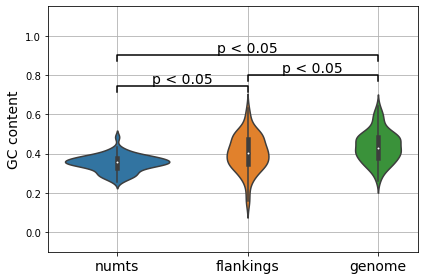

In [172]:
gcs = [numts_gc, flanking_gc, genome_gc]
ax = sns.violinplot(data = gcs)
ax.set_ylabel('GC content',
             fontsize = 14)
ax.set_xticklabels(['numts', 'flankings', 'genome'],
                  fontsize = 14)
statistical_annotation([numts_gc, flanking_gc], nufla_significance[1], [0,1], 0.05)
statistical_annotation([numts_gc, genome_gc], nuge_significance[1], [0,2], 0.2)
statistical_annotation([flanking_gc, genome_gc], flage_significance[1], [1,2], 0.1)
ax.set_ylim(-0.1, 1.15)
ax.set_axisbelow(True)
plt.grid()
plt.tight_layout()
#plt.savefig('../../results/gc_contents.png', dpi = 150, quality = 95)
plt.show()

In [236]:
import numpy as np
proba = 'AACNTGACTAGCANNNNNNNNACATCTAGCTAGCATTCGNATCNNNNNNNNNNNNACTATATATGCTGATCGAGCAT'

In [194]:
def sampling(to_sample, samplesize, controller):
    np.random.seed(controller)
    start = np.random.randint(0, len(to_sample) - samplesize)
    end = start + samplesize
    sample = to_sample[start:end]
    if 'N' not in sample:
        return sample
    else:
        controller += 1
        return sampling(to_sample, samplesize, controller)

In [195]:
sampling(proba, 10, 0)

'TCTAGCTAGC'